In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import cluster

In [ ]:
#reading the dataset into code and displaying first 5 rows
path='/content/Iris.csv'
df=pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#describing the datset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#obtaining information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#dropping the columns which shouldn't be a part of clusters
to_drop=['Id','Species']
df=df.drop(to_drop, axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Finding error through K Means approach**

In [ ]:
k_range= range(1,11)
model_score=[]
for i in k_range:
  model=cluster.KMeans(i)                       #creating model
  model.fit_predict(df)                         #creating clusters
  model_score.append(model.inertia_)            #model inertia for calculating error and appending to list
model_score           
           

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.94595367106237,
 34.19068792479662,
 30.227724598930486,
 28.403597084951915,
 26.538459595959594]

**Plotting the graph for errors (elbow method)**

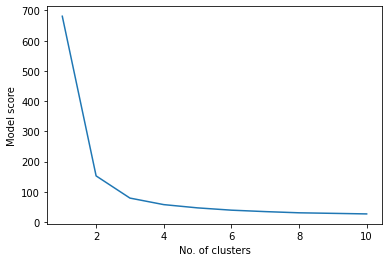

In [ ]:
plt.plot(k_range,model_score)
plt.xlabel('No. of clusters')
plt.ylabel('Model score')
plt.show()

**Elbow is formed at x=3, so optimal number of clusters=3**

In [ ]:
#the data is unstructured, so we don't have a target variable here
model= cluster.KMeans(3)
model_pred=model.fit_predict(df)
model_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
#inserting a column 'Group' with the the corresponding group number for each entry
df['Groups']=model_pred
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Groups
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#printing all attributes of Ids which belong to group 1

group1= df[df['Groups']==1]
group1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Groups
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1


In [ ]:
#printing all attributes of Ids which belong to group 0

group0= df[df['Groups']==0]
group0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Groups
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#printing all attributes of Ids which belong to group 2

group2= df[df['Groups']==2]
group2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Groups
52,6.9,3.1,4.9,1.5,2
77,6.7,3.0,5.0,1.7,2
100,6.3,3.3,6.0,2.5,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2


**1-50 is group 1, 51-100 is group 0 and 101-150 is group 2**